# Problem 0: Word embeddings++ (15%)

### This is an open ended expercise. Our goal is to create a robust set of embeddings by combining many of the techniques that we have learned so far. 

## Part I: Create the embeddings by using techniques such as text cleaning using regex, stemming, ngramming, TfIdf, or whatever else you think may yield good embeddings. (Hint: you may want to consider preserving case information for better entity handling)

In [1]:
import numpy as np
import pandas as pd
%pylab inline

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

Populating the interactive namespace from numpy and matplotlib


In [2]:
wiki_df = pd.read_csv('./kdwd_r1k_articles.csv')

In [3]:
# Use CountVectorizer and TruncatedSVD

In [4]:
vectorizer = CountVectorizer(
    
    analyzer='word',
    token_pattern='(?u)\\b\\w\\w+\\b',
    
    lowercase=True,
        
    min_df=3,  # minimum occurence
    max_df=1.0,  # max occurence
    
)

count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
vocab = {token: n for n, token in enumerate(pd.Series(vectorizer.vocabulary_).sort_values().index)}
inv_vocab = {v: k for k, v in vocab.items()}

In [5]:
svd = TruncatedSVD(n_components=64, random_state=6006)
trafo_count_matrix = svd.fit_transform(count_matrix.T)

In [6]:
sim_mat = cosine_similarity(trafo_count_matrix)

In [7]:
token = 'microsoft'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 microsoft
0.924 surface
0.923 basic
0.906 windows
0.898 edge
0.895 overall
0.892 followed
0.848 allen
0.816 bill
0.800 dominant


In [8]:
token = 'oil'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 oil
0.896 refiner
0.890 fuels
0.847 refining
0.825 irving
0.813 standard
0.810 widely
0.749 refineries
0.745 damage
0.741 14th


In [9]:
token = 'ceo'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 ceo
0.814 president
0.755 board
0.732 he
0.721 failed
0.720 chairman
0.710 executive
0.707 january
0.700 focus
0.692 size


In [10]:
token = 'cloud'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 cloud
0.786 code
0.784 weather
0.731 measurement
0.719 account
0.719 characters
0.717 view
0.714 amount
0.678 type
0.649 completely


In [11]:
# Include n-Gram and stop words

In [12]:
from sklearn.feature_extraction import stop_words
vectorizer = CountVectorizer(
    
    analyzer='word',
    token_pattern='(?u)\\b\\w\\w+\\b',
    
    lowercase=True,
    stop_words=stop_words.ENGLISH_STOP_WORDS,

    ngram_range=(1, 2),  # n-grams
    
    min_df=3,  # minimum occurence
    max_df=1.0,  # max occurence
    
)

count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
vocab = {token: n for n, token in enumerate(pd.Series(vectorizer.vocabulary_).sort_values().index)}
inv_vocab = {v: k for k, v in vocab.items()}

In [13]:
svd = TruncatedSVD(n_components=64, random_state=6006)
trafo_count_matrix = svd.fit_transform(count_matrix.T)

In [14]:
sim_mat = cosine_similarity(trafo_count_matrix)

In [15]:
token = 'microsoft'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 microsoft
0.957 basic
0.912 surface
0.910 microsoft windows
0.910 windows
0.902 followed
0.900 cloud computing
0.891 edge
0.885 largest software
0.879 30 2018


In [16]:
token = 'oil'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 oil
0.956 oil gas
0.941 oil company
0.939 headquartered irving
0.919 refiner
0.919 oil companies
0.911 damage
0.904 irving texas
0.904 largest oil
0.894 fuels


In [17]:
token = 'ceo'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 ceo
0.779 president
0.727 board
0.726 chairman
0.714 new ceo
0.694 failed
0.689 remained
0.681 2007
0.677 2011
0.667 replaced


In [18]:
token = 'cloud'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 cloud
0.773 code
0.764 servers
0.752 cloud computing
0.675 type
0.673 application
0.671 software service
0.670 web
0.666 headquartered seattle
0.657 weather


In [19]:
# Use TFIDF-Weighting

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=3, max_df=1.0)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
vocab = {token: n for n, token in enumerate(pd.Series(vectorizer.vocabulary_).sort_values().index)}
inv_vocab = {v: k for k, v in vocab.items()}

In [21]:
svd = TruncatedSVD(n_components=64, random_state=6006)
trafo_count_matrix = svd.fit_transform(count_matrix.T)

In [22]:
sim_mat = cosine_similarity(trafo_count_matrix)

In [23]:
token = 'microsoft'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 microsoft
0.913 desktop
0.834 server
0.829 dominant
0.805 x86
0.765 windows
0.765 architecture
0.752 servers
0.742 computing
0.719 computers


In [24]:
token = 'oil'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 oil
0.884 upstream
0.828 malaysia
0.820 offshore
0.781 drilling
0.770 050
0.757 rigs
0.753 change
0.748 completion
0.735 production


In [25]:
token = 'ceo'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 ceo
0.839 chairman
0.743 president
0.682 former
0.650 steve
0.650 resigned
0.617 led
0.604 role
0.600 served
0.595 license


In [26]:
token = 'cloud'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 cloud
0.813 application
0.733 computing
0.718 networking
0.712 sunnyvale
0.689 receive
0.686 defined
0.682 code
0.680 calls
0.657 web


In [27]:
# Change our corpus to larger dataset

In [28]:
wiki_df = pd.read_csv('./kdwd_featured_articles.csv')

In [29]:
vectorizer = TfidfVectorizer(min_df=3, max_df=1.0)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
vocab = {token: n for n, token in enumerate(pd.Series(vectorizer.vocabulary_).sort_values().index)}
inv_vocab = {v: k for k, v in vocab.items()}

In [30]:
svd = TruncatedSVD(n_components=64, random_state=6006)
trafo_count_matrix = svd.fit_transform(count_matrix.T)

In [31]:
sim_mat = cosine_similarity(trafo_count_matrix)

In [32]:
token = 'microsoft'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 microsoft
0.982 developers
0.970 xbox
0.969 windows
0.968 interactive
0.967 gameplay
0.966 downloadable
0.966 graphics
0.959 ios
0.958 multiplayer


In [33]:
token = 'oil'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 oil
0.961 painting
0.955 canvas
0.944 paintings
0.935 reproductions
0.935 nude
0.933 exhibited
0.928 etty
0.927 painterly
0.926 indecency


In [34]:
token = 'ceo'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 ceo
0.662 abortion
0.648 tuesday
0.646 inc
0.640 grammys
0.634 pendleton
0.633 licensing
0.628 eli
0.615 guinness
0.614 nomination


In [35]:
token = 'cloud'
word_idx = vocab[token]
for idx, row in pd.Series(sim_mat[word_idx]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

1.000 cloud
0.932 velocity
0.925 sun
0.924 dust
0.919 gravitationally
0.919 astronomers
0.915 massive
0.914 planets
0.911 objects
0.910 disk


## Part II: Think about how we can evaluate our embeddings and compare them to simpler techniques covered in class. (Hint: some basic word statistics and examples can go a long way here)

In [36]:
# Use GloVe corpus

In [37]:
from gensim.models import KeyedVectors

In [38]:
model = KeyedVectors.load_word2vec_format(
    './glove.6B.50d.txt', 
    binary=False
)

In [39]:
model.most_similar('microsoft', topn=10)

[('google', 0.8450709581375122),
 ('ibm', 0.841211199760437),
 ('software', 0.8281513452529907),
 ('intel', 0.8273229598999023),
 ('netscape', 0.8212510347366333),
 ('yahoo', 0.8106437921524048),
 ('aol', 0.8012619018554688),
 ('oracle', 0.7997608184814453),
 ('cisco', 0.7832400798797607),
 ('compaq', 0.746559739112854)]

In [40]:
model.most_similar('oil', topn=10)

[('crude', 0.8536815047264099),
 ('petroleum', 0.8413494229316711),
 ('gas', 0.8313400745391846),
 ('energy', 0.8022806644439697),
 ('supply', 0.7696146965026855),
 ('fuel', 0.7656652927398682),
 ('grain', 0.7601252794265747),
 ('exports', 0.7591190338134766),
 ('supplies', 0.7502518892288208),
 ('prices', 0.7354471683502197)]

In [41]:
model.most_similar('ceo', topn=10)

[('executive', 0.911155641078949),
 ('chairman', 0.84330815076828),
 ('chief', 0.7824074029922485),
 ('vice', 0.7623285055160522),
 ('managing', 0.7437090873718262),
 ('manager', 0.729428231716156),
 ('cfo', 0.7279371023178101),
 ('co', 0.7262787222862244),
 ('announced', 0.6999826431274414),
 ('company', 0.6858142018318176)]

In [42]:
model.most_similar('cloud', topn=10)

[('clouds', 0.821401059627533),
 ('dust', 0.7634189128875732),
 ('horizon', 0.7331849336624146),
 ('beneath', 0.720876157283783),
 ('surface', 0.719190239906311),
 ('sky', 0.7017689943313599),
 ('visible', 0.7004544138908386),
 ('ash', 0.6955233812332153),
 ('sunlight', 0.6899121999740601),
 ('ocean', 0.686274528503418)]

In [43]:
model.most_similar(positive=['steve', 'jobs'], topn=5)

[('job', 0.8104128241539001),
 ('hired', 0.7492485046386719),
 ('bob', 0.7301130294799805),
 ('spent', 0.7180465459823608),
 ('working', 0.7085384726524353)]

In [44]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.8523603677749634),
 ('throne', 0.7664333581924438),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.7460219860076904)]

In [45]:
model.most_similar(positive=['microsoft', 'iphone'], negative=['apple'], topn=5)

[('google', 0.7364129424095154),
 ('xbox', 0.7173627614974976),
 ('yahoo', 0.7048122882843018),
 ('smartphone', 0.6997253894805908),
 ('xp', 0.6943330764770508)]

In [46]:
# Evaluate texts

In [47]:
sentence = "Tomorrow, Apple will release its new iPhone."

In [48]:
tokens = re.findall('[a-z]+', sentence.lower())
token_embed_vectors = [model[t] for t in tokens if t in model]
sentence_embed_vector = np.mean(token_embed_vectors, axis=0)

In [49]:
sentence_options = [
    "Fourteen tomatos are heavier than six mushrooms.",
    "Microsoft is launching Windows 7.",
    "Rabbits that get released into the wild eat carrots.",
]

def get_doc_embed(s):
    tokens = re.findall('[a-z]+', s.lower())
    return np.mean([model[t] for t in tokens if t in model], axis=0)

v1 = get_doc_embed(sentence)
for s in sentence_options:
    v2 = get_doc_embed(s)
    print(round(cosine_similarity([v1], [v2])[0][0], 3), '-', s)

0.605 - Fourteen tomatos are heavier than six mushrooms.
0.879 - Microsoft is launching Windows 7.
0.764 - Rabbits that get released into the wild eat carrots.


# Problem 1: Metrics vs Loss functions (10%)
### As we said in lecture, we optimize (minimize) the loss function, but monitor metrics without letting the model know about their value.

### A very common loss/metric pair is crossentropy for the loss and accuracy for the metric. Often, these two numbers correlate, but they are not guaranteed to do some. 

### In this problem, you will come up with 3 sets of 20 synthetic values for predicted probability in a binary classification problem where the crossentropy and accuracy are anti correlated. Plot the loss vs the accuracy.

In [1]:
# safe to restart
import numpy as np
import pandas as pd
%pylab inline
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)  # 将数值限定在min_value, max_value的范围内
    num_datapoints = predictions.shape[0]
    ce = -1 * np.sum(targets*np.log(predictions + 1e-9)) / num_datapoints
    return ce

Text(0, 0.5, 'Accuracy')

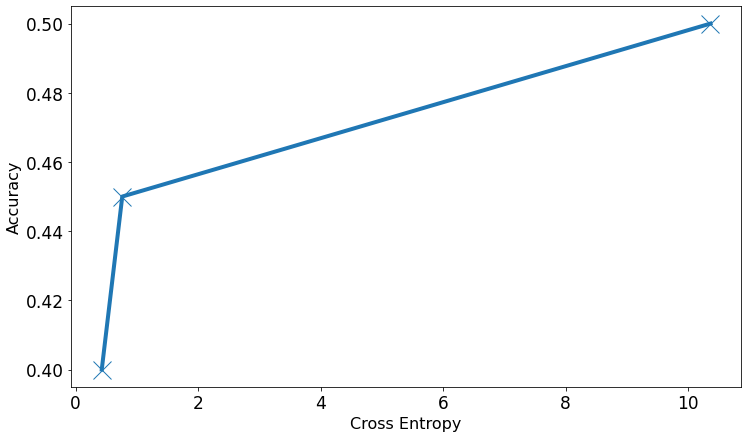

In [3]:
# Hint: not all right and wrong answers are created equally

y_true = np.array([1]*20)
predictions_1 = np.array([1]*10+[0]*10)
predictions_2 = np.array([1]*9+[0.25]*11)
predictions_3 = np.array([1]*8+[0.49]*12)

preds = [predictions_1, predictions_2, predictions_3]

cross_entropies = [cross_entropy(y_pred, y_true) for y_pred in preds]
accuracies = [accuracy_score(y_true, y_pred > 0.5) for y_pred in preds]
pd.Series(accuracies, index=cross_entropies).plot(
    style='-x', figsize=(12,7), fontsize=17,
    markersize=18, linewidth=4
)
plt.xlabel('Cross Entropy', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Problem 2: Cross Validation (10%)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error

Populating the interactive namespace from numpy and matplotlib


### Part 1: Generate some data
 - Generate data with 1024 points and 10 features. 
 - Create targets that are linear combinations of the 10 features and add some noise. 
 - Split the data into train/test 80/20 percent. 

In [5]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 0, 2, 0, 4, 0, 0])  # notice, there are zeros!
noise_amplitude = 5

num_variables = coefs.shape[0]

x = np.random.randn(num_observations, len(coefs))*noise_amplitude+2
y = (np.matmul(x,coefs)+ np.random.randn(1,num_observations)*noise_amplitude).T

train_size = int(num_observations*0.8)
x_train, x_test = x[:train_size,:], x[train_size:,:]
y_train, y_test = y[:train_size,:], y[train_size:,:]

del x, y  

### Part 2: cross validation
Here we will cross validate our data to find the best set of parameters for `Lasso` regression. We will tune the regularization strength (`alpha`) and whether we fit an intercept to the data. 
 - For each set of parameters find fit an estimator
 - Calculate the mean squared error on the test set
 - store the results (both the MSE and the parameters) so we can do analysis later

In [6]:
alphas = [0.1*i for i in range(1,10)]
fit_intercepts = [True, False]

# everything below to be removed
# for all possible combinations, compute necessary metrics
results = [[],[]]

for a in alphas:
    for f in fit_intercepts:
        clf = Lasso(alpha=a, fit_intercept=f)      # 一类有约束的回规，通过损失函数可以让部分参数为0
        clf.fit(x_train, y_train)
        r2 = r2_score(y_test, clf.predict(x_test))
        mse = mean_squared_error(y_test, clf.predict(x_test))
        results[int(f)].append((a,r2,mse))
        
# put code here

### Part 3: Analysis
 - for each value of `fit_intercept` plot the `MSE` and `r2` scores as a function of alpha. 
 - What is the overall best combination of parameters

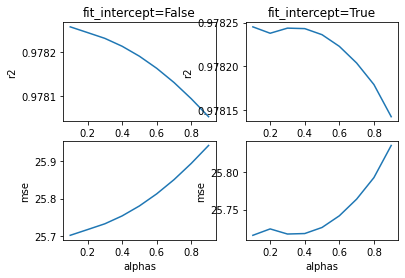

In [7]:
fig, axs = plt.subplots(2, 2)

# your plotting code here
for f in fit_intercepts:
    alphas = [t[0] for t in results[int(f)]]
    r2 = [t[1] for t in results[int(f)]]
    mse = [t[2] for t in results[int(f)]]
    axs[0, int(f)].plot(alphas, r2)
    axs[0, int(f)].set_title('fit_intercept={}'.format(f))
    axs[0, int(f)].set(xlabel='alphas', ylabel='r2')
    axs[1, int(f)].plot(alphas, mse)
    axs[1, int(f)].set(xlabel='alphas', ylabel='mse')
    

The best combination is when alpha is small and we set `fit_intercept = True`

# Problem 3: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = .05

num_variables = coefs.shape[0]

x = np.random.rand(num_observations, num_variables)
y = (np.matmul(x, coefs) + (noise_amplitude * np.random.rand(1, num_observations))).T
print(y.shape)


# your code here, 
# split data into x_train, x_test, y_train, y_test
train_size = int(num_observations*0.8)
x_train, x_test = x[:train_size,:], x[train_size:,:]
y_train, y_test = y[:train_size,], y[train_size:,]

(1024, 1)


In [3]:
x_train.shape, y_train.shape
type(x_train)

numpy.ndarray

In [4]:
# fit linear regression here and calculate MSE
# put code here

model = LinearRegression()
coefs_reg = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE:%f  r2_score:%f" % (MSE, R2))

MSE:0.000196  r2_score:0.999944


In [5]:
# Show that the coefficients are all close the "real" ones used to generate the data
# put code here
coefs_reg = model.coef_[0]
print("Real coefficients:", coefs)
print("Predicted coefficients:", coefs_reg)

Real coefficients: [-1.2   5.    0.    0.22  2.    0.    4.  ]
Predicted coefficients: [-1.19888194e+00  5.00173143e+00  1.37289279e-03  2.18767048e-01
  1.99612945e+00  1.11601372e-03  4.00104707e+00]


In [6]:
import keras.layers as KL
import keras.backend as K
import pydot
from IPython.display import SVG
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as

In [7]:
# Now we will use keras to solve the same problem 
input_data = KL.Input(shape=x_train.shape)
# add model definition here

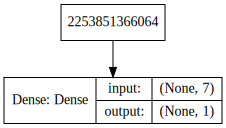

In [8]:
K.clear_session()
# build model here
keras_lin_reg = Sequential()
keras_lin_reg.add(Dense(1, input_dim=coefs.shape[0], name="Dense"))
# don't forget to compile model here

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
keras_lin_reg.compile(loss='mse', optimizer=sgd)

# plot the model
plot_model_in_notebook(keras_lin_reg)

## How many parameters does the model have? 
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [19]:
# ADD CODE HERE
print(keras_lin_reg.count_params())

8


## Fit the model and calculate the MSE

In [20]:
# fit the model here

train_epoch = 1500
show_epoch = 300

for epoch in range(train_epoch):
    loss = keras_lin_reg.train_on_batch(x_train, y_train)
    if epoch % show_epoch == 0:
        print("After %d epochs, the loss is: %f" % (epoch, loss))
        
# calculate mse
y_pred = keras_lin_reg.predict(x_test)
print(y_pred.shape)
MSE = mean_squared_error(y_test, y_pred)
print("MSE: %f" % MSE)

After 0 epochs, the loss is: 27.922493
After 300 epochs, the loss is: 0.003135
After 600 epochs, the loss is: 0.000272
After 900 epochs, the loss is: 0.000208
After 1200 epochs, the loss is: 0.000207
(205, 1)
MSE: 0.000188


## get the coefficients and compare them to the real coefficients

In [21]:
# add code here
lin_reg_coefs, _ = keras_lin_reg.get_layer('Dense').get_weights()
lin_reg_coefs = np.squeeze(lin_reg_coefs)
print("Real coefficients:", coefs)
print("Predicted coefficients:", lin_reg_coefs)

Real coefficients: [-1.2   5.    0.    0.22  2.    0.    4.  ]
Predicted coefficients: [-1.2010928e+00  5.0014496e+00 -6.3487259e-04  2.2029732e-01
  2.0003860e+00  1.5838676e-03  3.9992833e+00]


## Now we will add some regularization

In [22]:
from keras.regularizers import l1_l2
regularizer = l1_l2(l1=0, l2=.1)
 # Dense(...) -> Dense(..., kernel_regularizer=regularizer)

keras_ridge_model = Sequential()
keras_ridge_model.add(Dense(1, input_dim=coefs.shape[0], kernel_regularizer=regularizer, name="Dense"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
keras_ridge_model.compile(loss='mse', optimizer=sgd)

In [23]:
# fit the model and calculate the MSE

train_epoch = 1500
show_epoch = 300

for epoch in range(train_epoch):
    loss = keras_ridge_model.train_on_batch(x_train, y_train)
    if epoch % show_epoch == 0:
        print("After %d epochs, the loss is: %f" % (epoch, loss))
        

y_pred = keras_ridge_model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print("MSE: %f" % MSE)

After 0 epochs, the loss is: 26.748163
After 300 epochs, the loss is: 2.183572
After 600 epochs, the loss is: 2.183549
After 900 epochs, the loss is: 2.183549
After 1200 epochs, the loss is: 2.183549
MSE: 1.231391


In [24]:
# find the coefficients and compare them to the real ones
keras_ridge_coefs, _ = keras_lin_reg.get_layer('Dense').get_weights()
keras_ridge_coefs = np.squeeze(keras_ridge_coefs)
pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras ridge coefficients,real coefficients
0,-1.201093,-1.20
1,5.001450,5.00
2,-0.000635,0.00
3,0.220297,0.22
4,2.000386,2.00
5,0.001584,0.00
6,3.999283,4.00


In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(x_train, y_train)
pd.Series(np.squeeze(ridge.coef_), name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,ridge coefficients,real coefficients
0,-0.449921,-1.20
1,2.085208,5.00
2,0.066158,0.00
3,-0.033747,0.22
4,0.805772,2.00
5,0.052516,0.00
6,1.743972,4.00


In [26]:
# compare coefficients from various methods
pd.concat([
    pd.Series(np.squeeze(ridge.coef_), name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(coefs, name='real coefs')
], axis=1)

,ridge coefs,keras L2 coefs,real coefs
0,-0.449921,-1.201093,-1.20
1,2.085208,5.001450,5.00
2,0.066158,-0.000635,0.00
3,-0.033747,0.220297,0.22
4,0.805772,2.000386,2.00
5,0.052516,0.001584,0.00
6,1.743972,3.999283,4.00


## In fact, given the zero coefficients, LASSO might have been a better model. 
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, fit_intercept=True)      # constrained regression
lasso.fit(x_train, y_train)

lasso_coefs = lasso.coef_
pd.Series(lasso_coefs, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,lasso coefficients,real coefficients
0,-0.000000,-1.20
1,3.872086,5.00
2,0.000000,0.00
3,0.000000,0.22
4,0.768193,2.00
5,0.000000,0.00
6,2.901648,4.00


In [28]:
regularizer = l1_l2(l1=0.1, l2=0)  # to be removed

keras_lasso_model = Sequential()
keras_lasso_model.add(Dense(1, input_dim=coefs.shape[0], kernel_regularizer=regularizer, name="Dense"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
keras_lasso_model.compile(loss='mse', optimizer=sgd)

In [29]:
train_epoch = 1500
show_epoch = 300

for epoch in range(train_epoch):
    loss = keras_ridge_model.train_on_batch(x_train, y_train)
    if epoch % show_epoch == 0:
        print("After %d epochs, the loss is: %f" % (epoch, loss))
        
keras_lasso_coefs, _ = keras_lasso_model.get_layer('Dense').get_weights()
keras_lasso_coefs = np.squeeze(keras_lasso_coefs)

After 0 epochs, the loss is: 2.183549
After 300 epochs, the loss is: 2.183549
After 600 epochs, the loss is: 2.183549
After 900 epochs, the loss is: 2.183549
After 1200 epochs, the loss is: 2.183549


In [30]:
# compare all the coefficients
pd.concat([
    pd.Series(np.squeeze(ridge.coef_), name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(lasso.coef_, name='lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
    pd.Series(lin_reg_coefs, name='ols coefs'),
    pd.Series(coefs, name='real coefs'),
], axis=1)

,ridge coefs,keras L2 coefs,lasso coefs,keras L1 coefs,ols coefs,real coefs
0,-0.449921,-1.201093,-0.000000,-0.161360,-1.201093,-1.20
1,2.085208,5.001450,3.872086,0.143780,5.001450,5.00
2,0.066158,-0.000635,0.000000,0.623117,-0.000635,0.00
3,-0.033747,0.220297,0.000000,0.535114,0.220297,0.22
4,0.805772,2.000386,0.768193,0.335389,2.000386,2.00
5,0.052516,0.001584,0.000000,-0.300296,0.001584,0.00
6,1.743972,3.999283,2.901648,-0.252812,3.999283,4.00


## Comment on the results

In [ ]:
# OLS coefficients are the closest to real coefficients.However,Lasso regression generally gets better result compared to OLS ridge regression when the coefficients are 0.The results from keras and scikit learn are different mainly because of divergent optimization methods.

In [ ]:
# Safe to restart here

# Problem 4: Custom Loss Functions (10%)
### In this problem we will explore the use of custom loss function to better capture desired behavior in a model.
### In particular, we will examine the tradeoff between false positives and true positives

In [1]:
# safe to restart here

In [4]:
import numpy as np
import pandas as pd
import keras.layers as KL
import keras.backend as K
from keras.datasets import mnist
%pylab inline

# many of these to be removed
# Insert necessary imports here

Populating the interactive namespace from numpy and matplotlib


## Part 0: Data preparation
 - ### Load the `mnist` data and subset the data only to the classes `4` and `9`
 - ### This way we have a binary classification task for simplicity

In [5]:
from keras.utils import to_categorical

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)

def subset_to_9_and_4(x, y):  # this is a new function
    # insert code here:
    new_x = np.full((x.shape),0.0)
    new_y = np.full((y.shape),False)
    for idx in range(len(x)):
        if y[idx] == 9 or y[idx] == 4:
            new_x[idx] = x[idx]
        if y[idx] == 4:
            new_y[idx] = True
        else:
            new_y[idx] = False
    return new_x, new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # x_train[60000:784], y_train[60000]

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

print(x_train.shape)

(60000, 784)


## Part 1: fit logistic regression in `scikit-learn` and compute the true positive and false positive rates

In [6]:
%%time
# insert code here
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict_proba(x_test)
y_pred = [True if y_pred[x][1]>y_pred[x][0] else False for x in range(len(y_pred))]

Wall time: 4.74 s


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
# put your code here
total_predicted_pos = sum(y_pred)
total_true_pos = sum(y_test)
correct_predicted_pos = sum([1 if y_pred[x]==True and y_test[x]==True else 0 for x in range(len(y_test))])

tpr =  correct_predicted_pos / total_true_pos
fpr =  (total_predicted_pos - correct_predicted_pos)/ (len(y_test) - total_true_pos)
fnr =  1 - tpr
print('false positive rate {:.3f}'.format(fpr))
print('false negative rate {:.3f}'.format(fnr))

false positive rate 0.004
false negative rate 0.037


In [8]:
for x in range(len(y_test)):
    if y_test[x] != y_pred[x]:
        print(x)

336
575
707
740
760
874
959
969
1192
1232
1242
1357
1413
1422
1429
1440
1634
1901
1963
2043
2053
2129
2161
2232
2414
2514
2548
2720
2771
2863
2877
3066
3288
3490
3533
3718
3758
3798
3821
3869
3970
3985
4000
4017
4093
4154
4174
4265
4405
4425
4444
4567
4575
4721
4735
4823
4893
4910
4929
5926
6568
6817
7081
7089
7434
8406
8426
8520
9170
9587
9764
9792
9808


## Part 2: A custom loss function
### Write a function that returns a custom loss function
### As a shortcut, we can modify the loss function to be
### $J(\theta )$=`regular crossentropy `  $\times$  $\alpha$ 

### where 
 - ### $\alpha=$ 1 + `weight_factor` (a number greater than 0) for the positive class (`y=1`)
 - ### $\alpha=$ `1` for the negative class (`y=0`)

### Like this we can over weight how much we care about positive examples. 

# $ \\ $
## Function
### Inputs:
 - ### `weight_factor`: the multiplicative factor for how much to weight errors in the `1` class over `0`

### Output:
 - ### a function that has inputs `(y_true, y_pred)` that is a viable keras loss function. 


In [9]:
def get_loss_function(weight_factor):
    def my_cross_entropy(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1. - 1e-7)
        data_size = y_pred.shape[0]
        y_label = K.cast(y_true, dtype="float32")
        ce = -1 * K.sum(K.log(y_pred) * (y_label * (1.0+weight_factor)) + K.log(1.0 - y_pred) * (1 - y_label))
        ce = ce / data_size
        return ce
    return my_cross_entropy

## Part 3: Fit Models with Different `weight_factors`
## Steps
 - ### For values in `np.linspace(0, 20, 50)` fit logistic regression in keras.
 - ### For each model compute the true positive and false positive rate
 - ### Make a plot of true positives and false positives as a function of `weight_factor`
 - ### Make a plot of true positives as a function of false positives

In [10]:
import keras.layers as KL
import keras.backend as K
from keras import optimizers, Model
from keras.layers import Dense
from keras.models import Sequential

In [11]:
print(type(x_train), type(y_train))
print(y_train[:10])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[False False  True False False False False False False  True]


In [12]:
res = {}

train_epoch = 1500
show_epoch = 30

for wt in np.linspace(0, 20, 50):
    K.clear_session()
    digit_input = KL.Input(shape=(x_train.shape[1],), name='digit_input')
    
    output = KL.Dense(1, name="Dense")(digit_input) #, activation='sigmoid'
    model = Model(inputs=[digit_input], outputs=[output])
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer=sgd, loss=[get_loss_function(wt)])
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred = [True if y_pred[x] > 0.5 else False for x in range(len(y_pred))]
    
    total_predicted_pos = sum(y_pred)
    total_true_pos = sum(y_test)
    correct_predicted_pos = sum([1 if y_pred[x] and y_test[x] else 0 for x in range(len(y_test))])
    
    tpr =  correct_predicted_pos / total_true_pos
    fpr =  (total_predicted_pos - correct_predicted_pos)/ (len(y_test) - total_true_pos)
    
    # print(total_predicted_pos, correct_predicted_pos)
    # print(tpr, fpr)

    # calculate metrics here and save them in `res`
    res[wt] = [tpr, fpr]
    

ValueError: None values not supported.

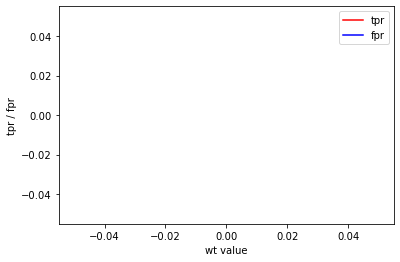

In [13]:
# put plotting code here
# true positive and false positives as a function of wt
wt_list = []
tpr_list, fpr_list = [], []
for key, value in res.items():
    wt_list.append(key)
    tpr, fpr = value
    tpr_list.append(tpr)
    fpr_list.append(fpr)

plt.plot(wt_list, tpr_list, label="tpr", color="r") 
plt.plot(wt_list, fpr_list, label="fpr", color="b") 
plt.xlabel('wt value') 
plt.ylabel('tpr / fpr') 
plt.legend() 
plt.show()


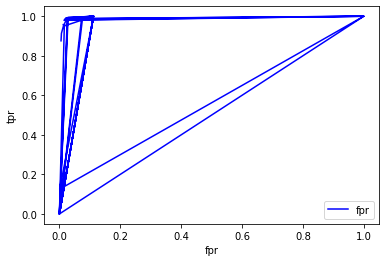

In [11]:
# true positives as a function of false positives
plt.plot(fpr_list, tpr_list, label="fpr", color="b") 
plt.xlabel('fpr') 
plt.ylabel('tpr') 
plt.legend() 
plt.show()

## Part 4: Thresholding vs Loss Function
### What is the difference between using regular crossentropy and changing thresholds vs changing the loss function? 
### Typically, we consider anything with a predicted probability of 0.5 or above to be a positive example. What if we change this number?

## Steps:
 - ### Fit logistic regression in keras with the regular (crossentropy) loss function
 - ### Find the false positive and true positive rates as a function of the `threshold` for which we consider a positive example. 
 - ### Make a plot of false positives as a function of true positives for this thresholding method.
 - ### On the same axes, plot the old curve of false positives as a function of true positives
 - ### Comment on what you find- what are the advantages and disadvantages of these two methods.

In [12]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [13]:
def cross_entropy(y_true, y_pred):
    y_pred = K.clip(y_pred, 1e-7, 1. - 1e-7)
    data_size = y_pred.shape[0]
    y_label = K.cast(y_true, dtype="float32")
    ce = -1 * K.sum(K.log(y_pred) * y_label + K.log(1.0 - y_pred) * (1 - y_label))
    ce = ce / data_size
    return ce

In [14]:
K.clear_session()
digit_input = KL.Input(shape=(x_train.shape[1],), name='digit_input')
# your code goes here

output = KL.Dense(1, name="Dense", activation='sigmoid')(digit_input)
model = Model(inputs=[digit_input], outputs=[output])
    
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss=cross_entropy)
model.fit(x_train, y_train)

1875/1875 [==============================] - 1s 395us/step - loss: 0.2497


In [15]:
pred_proba = model.predict(x_test)
print(pred_proba[:10])

[[0.0739533 ]
 [0.0739533 ]
 [0.0739533 ]
 [0.0739533 ]
 [0.5979102 ]
 [0.0739533 ]
 [0.63975406]
 [0.2939192 ]
 [0.0739533 ]
 [0.28111202]]


In [16]:
# your code here
threshold_list, fpr_list, tpr_list = [], [], []

for threshold in np.linspace(0.4, 0.8, 20):
    y_pred = [True if pred_proba[i] > threshold else False for i in range(len(pred_proba))]
    
    total_predicted_pos = sum(y_pred)
    total_true_pos = sum(y_test)
    correct_predicted_pos = sum([1 if y_pred[x] and y_test[x] else 0 for x in range(len(y_test))])
    
    tpr =  correct_predicted_pos / total_true_pos
    fpr =  (total_predicted_pos - correct_predicted_pos)/ (len(y_test) - total_true_pos)
    
    threshold_list.append(threshold)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

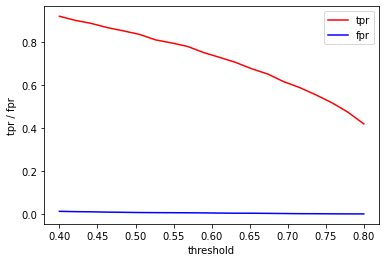

In [17]:
plt.plot(threshold_list, tpr_list, label="tpr", color="r") 
plt.plot(threshold_list, fpr_list, label="fpr", color="b") 
plt.xlabel('threshold') 
plt.ylabel('tpr / fpr') 
plt.legend() 
plt.show()

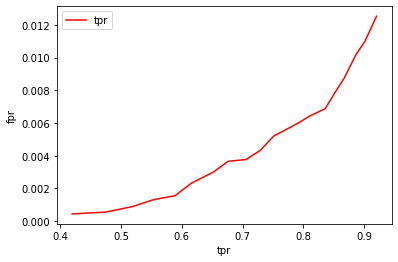

In [18]:
# Make a plot of false positives as a function of true positives for this thresholding method.
plt.plot(tpr_list, fpr_list, label="tpr", color="r") 
plt.xlabel('tpr') 
plt.ylabel('fpr') 
plt.legend() 
plt.show()

In [ ]:
# comments here 
# Increasing threshold would decrease tpr and fpr accordingly, decreasing threshold would decrease tnr and fnr accordingly. In ideal conditions, TPR would be close to 1 and FPR would be close to zero. Every point on ROC corresponds to a threshold, and every threshold would have one TPR and FPR. 
# When threshold reaches maximum, TP=FP=0, which is the original point; when threshold reaches minimum, TN=FN=0, which is the point(1,1).

# Problem 5: Custom Regularization (15%)

In [78]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
# necessary imports here

Populating the interactive namespace from numpy and matplotlib


In [79]:
np.random.seed(1234)
n_points = 2048

x = np.vstack([np.random.randn(n_points) + ii for ii in np.arange(-3, 3)]).T
real_coefs = np.array([1.4, 0.9, .1, -3, 2.2, -1.3])
y = x.dot(real_coefs) + .5 * np.random.randn(n_points)

In [80]:
x.shape

(2048, 6)

Text(0, 0.5, 'counts')

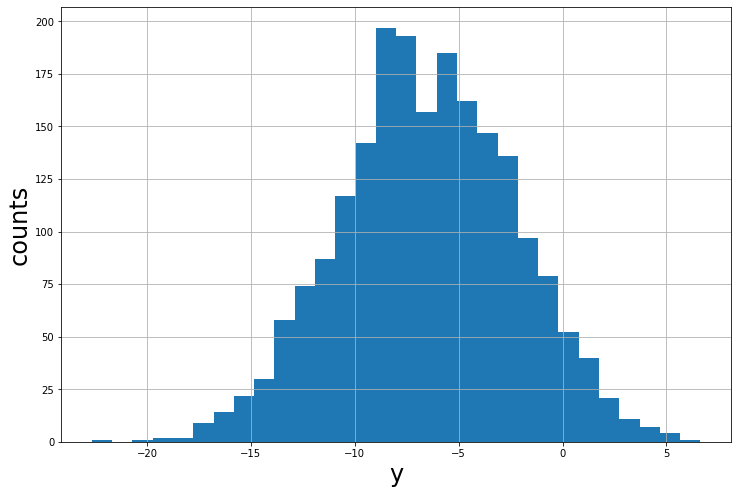

In [81]:
pd.Series(y).hist(bins=30, figsize=(12,8))
plt.xlabel('y', fontsize=24)
plt.ylabel('counts', fontsize=24)

## A new regularization
Sometimes, in the social science and in low-data situations a good rule of thumb is that instead of doing linear regression to find the coefficients, we can assume that all the coefficients are the same!

We will implement a variation on this by penalizing the `variance` of the coefficients, instead of the size.

__NOTE__: this is not a good thing to do in this situation- we have coefficients of different sign!

In this problem we will first solve linear regression with keras. Then we will add a custom regularizer to penalize the variance, and see what the effect are. 

# $ \\ $
# $ \\ $
## Part 0: Solve the problem with no regularization
### Steps:
 - ### Partition the data into train/test
 - ### Fit linear regression in keras with no regularization
 - ### Find the `mse` for the test set this model
 - ### Examine the coefficients and make sure they look correct

In [82]:
# partition the data
ratio = 0.8
y = np.array([y]).T
x_train = x[:int(x.shape[0]*ratio),:]
y_train = y[:int(y.shape[0]*ratio),:]
x_test = x[int(x.shape[0]*ratio):,:]
y_test = y[int(y.shape[0]*ratio):,:]

In [83]:
# fit the data 
from keras.layers import Dense
from keras.models import Sequential


model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1], activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.fit(x_train,y_train, batch_size=int(x_train.shape[0]/10), epochs=1000, shuffle=False, verbose = 2)

Epoch 1/1000
11/11 - 0s - loss: 59.7695 - mse: 59.7695
Epoch 2/1000
11/11 - 0s - loss: 58.3714 - mse: 58.3714
Epoch 3/1000
11/11 - 0s - loss: 57.0080 - mse: 57.0080
Epoch 4/1000
11/11 - 0s - loss: 55.6782 - mse: 55.6782
Epoch 5/1000
11/11 - 0s - loss: 54.3831 - mse: 54.3831
Epoch 6/1000
11/11 - 0s - loss: 53.1228 - mse: 53.1228
Epoch 7/1000
11/11 - 0s - loss: 51.8973 - mse: 51.8973
Epoch 8/1000
11/11 - 0s - loss: 50.7059 - mse: 50.7059
Epoch 9/1000
11/11 - 0s - loss: 49.5483 - mse: 49.5483
Epoch 10/1000
11/11 - 0s - loss: 48.4238 - mse: 48.4238
Epoch 11/1000
11/11 - 0s - loss: 47.3318 - mse: 47.3318
Epoch 12/1000
11/11 - 0s - loss: 46.2716 - mse: 46.2716
Epoch 13/1000
11/11 - 0s - loss: 45.2427 - mse: 45.2427
Epoch 14/1000
11/11 - 0s - loss: 44.2443 - mse: 44.2443
Epoch 15/1000
11/11 - 0s - loss: 43.2758 - mse: 43.2758
Epoch 16/1000
11/11 - 0s - loss: 42.3366 - mse: 42.3366
Epoch 17/1000
11/11 - 0s - loss: 41.4260 - mse: 41.4260
Epoch 18/1000
11/11 - 0s - loss: 40.5434 - mse: 40.5434
E

In [84]:
from sklearn.metrics import mean_squared_error
# calculate MSE
y_pred = model.predict(x_test,verbose=1)
mean_squared_error(y_pred,y_test)

13/13 [==============================] - 0s 460us/step


0.2764385228250033

In [85]:
model.get_weights()

[array([[ 1.4176197 ],
        [ 0.87356246],
        [ 0.08387318],
        [-2.996035  ],
        [ 2.1908495 ],
        [-1.2839789 ]], dtype=float32),
 array([-0.03909401], dtype=float32)]

In [ ]:
# examine coefs and make sure they look right

In [86]:
import tensorflow as tf

## Part 1: Add Regularization
## Steps:
 - ### Make a function that given a `weight_factor` returns a well-formed keras regularization function that penalizes the variance of coefficients by this factor. 
 - ### Fit a model with this regularizer with a `weight_factor` of `1.0`. 
 - ### Calculate the `mse` on the test set and examine the coefficients. 

__Note__: the coefficients should be closer together. Are they?


In [87]:
def make_reg_function(wt_factor):
    def my_reg(weight_matrix):
        return tf.reduce_mean(tf.square(tf.subtract(weight_matrix,tf.reduce_mean(weight_matrix))))*wt_factor
    return my_reg



In [88]:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1], activation='linear', kernel_regularizer = make_reg_function(1.0)))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.fit(x_train,y_train, batch_size=int(x_train.shape[0]/10), epochs=1000, shuffle=False, verbose = 2)


Epoch 1/1000
11/11 - 0s - loss: 39.8541 - mse: 39.6465
Epoch 2/1000
11/11 - 0s - loss: 38.8056 - mse: 38.5925
Epoch 3/1000
11/11 - 0s - loss: 37.7920 - mse: 37.5732
Epoch 4/1000
11/11 - 0s - loss: 36.8124 - mse: 36.5878
Epoch 5/1000
11/11 - 0s - loss: 35.8671 - mse: 35.6366
Epoch 6/1000
11/11 - 0s - loss: 34.9562 - mse: 34.7197
Epoch 7/1000
11/11 - 0s - loss: 34.0789 - mse: 33.8364
Epoch 8/1000
11/11 - 0s - loss: 33.2344 - mse: 32.9858
Epoch 9/1000
11/11 - 0s - loss: 32.4217 - mse: 32.1669
Epoch 10/1000
11/11 - 0s - loss: 31.6397 - mse: 31.3789
Epoch 11/1000
11/11 - 0s - loss: 30.8875 - mse: 30.6205
Epoch 12/1000
11/11 - 0s - loss: 30.1638 - mse: 29.8907
Epoch 13/1000
11/11 - 0s - loss: 29.4676 - mse: 29.1884
Epoch 14/1000
11/11 - 0s - loss: 28.7978 - mse: 28.5125
Epoch 15/1000
11/11 - 0s - loss: 28.1532 - mse: 27.8619
Epoch 16/1000
11/11 - 0s - loss: 27.5326 - mse: 27.2354
Epoch 17/1000
11/11 - 0s - loss: 26.9350 - mse: 26.6319
Epoch 18/1000
11/11 - 0s - loss: 26.3592 - mse: 26.0504
E

In [89]:
# examine coefs
model.get_weights()

[array([[ 1.2001652 ],
        [ 0.74376196],
        [ 0.09611327],
        [-2.5134697 ],
        [ 1.8633989 ],
        [-1.0702358 ]], dtype=float32),
 array([-1.0333534], dtype=float32)]

In [90]:
# calculate MSE
y_pred = model.predict(x_test,verbose=1)
mean_squared_error(y_pred,y_test)

13/13 [==============================] - 0s 537us/step


0.7148016528828431

## Part 2: Turn up the Regularization
## Steps
 - ### Repeat part 1 with the weight factor turned up to many times its initial value
 - ### Calculate the `mse` on the test set
 - ### examine the coefficients and comment
 - ### compare these results to the best constant guess for `y`.

In [91]:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1], activation='linear', kernel_regularizer = make_reg_function(20.0)))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.fit(x_train,y_train, batch_size=int(x_train.shape[0]/10), epochs=1000, shuffle=False, verbose = 2)
# make and fit a model with MUCH more regularization

Epoch 1/1000
11/11 - 0s - loss: 24.9927 - mse: 19.7510
Epoch 2/1000
11/11 - 0s - loss: 24.6428 - mse: 19.3143
Epoch 3/1000
11/11 - 0s - loss: 24.3186 - mse: 18.9073
Epoch 4/1000
11/11 - 0s - loss: 24.0171 - mse: 18.5283
Epoch 5/1000
11/11 - 0s - loss: 23.7369 - mse: 18.1774
Epoch 6/1000
11/11 - 0s - loss: 23.4762 - mse: 17.8540
Epoch 7/1000
11/11 - 0s - loss: 23.2326 - mse: 17.5565
Epoch 8/1000
11/11 - 0s - loss: 23.0042 - mse: 17.2827
Epoch 9/1000
11/11 - 0s - loss: 22.7887 - mse: 17.0303
Epoch 10/1000
11/11 - 0s - loss: 22.5847 - mse: 16.7970
Epoch 11/1000
11/11 - 0s - loss: 22.3905 - mse: 16.5807
Epoch 12/1000
11/11 - 0s - loss: 22.2050 - mse: 16.3793
Epoch 13/1000
11/11 - 0s - loss: 22.0274 - mse: 16.1909
Epoch 14/1000
11/11 - 0s - loss: 21.8568 - mse: 16.0140
Epoch 15/1000
11/11 - 0s - loss: 21.6927 - mse: 15.8472
Epoch 16/1000
11/11 - 0s - loss: 21.5347 - mse: 15.6891
Epoch 17/1000
11/11 - 0s - loss: 21.3822 - mse: 15.5390
Epoch 18/1000
11/11 - 0s - loss: 21.2351 - mse: 15.3957
E

In [92]:
# look at the coefs
model.get_weights()

[array([[ 0.3635911 ],
        [ 0.24955693],
        [ 0.10539468],
        [-0.5656785 ],
        [ 0.53672856],
        [-0.205129  ]], dtype=float32),
 array([-4.89898], dtype=float32)]

In [93]:
# calculate MSE
y_pred = model.predict(x_test,verbose=1)
mean_squared_error(y_pred,y_test)

13/13 [==============================] - 0s 767us/step


11.231797634773105

In [94]:
model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1], activation='linear', kernel_regularizer = make_reg_function(200.0)))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.fit(x_train,y_train, batch_size=int(x_train.shape[0]/10), epochs=1000, shuffle=False, verbose = 1)

Epoch 1/1000
11/11 [==============================] - 0s 725us/step - loss: 94.2546 - mse: 75.2632
Epoch 2/1000
11/11 [==============================] - 0s 453us/step - loss: 92.0250 - mse: 73.5810
Epoch 3/1000
11/11 [==============================] - 0s 453us/step - loss: 89.8866 - mse: 71.9570
Epoch 4/1000
11/11 [==============================] - 0s 453us/step - loss: 87.8409 - mse: 70.3999
Epoch 5/1000
11/11 [==============================] - 0s 453us/step - loss: 85.8874 - mse: 68.9178
Epoch 6/1000
11/11 [==============================] - 0s 725us/step - loss: 84.0225 - mse: 67.5145
Epoch 7/1000
11/11 [==============================] - 0s 544us/step - loss: 82.2411 - mse: 66.1907
Epoch 8/1000
11/11 [==============================] - 0s 725us/step - loss: 80.5377 - mse: 64.9447
Epoch 9/1000
11/11 [==============================] - 0s 453us/step - loss: 78.9070 - mse: 63.7726
Epoch 10/1000
11/11 [==============================] - 0s 635us/step - loss: 77.3442 - mse: 62.6694
Epoch 11/

In [95]:
# look at the coefs
model.get_weights()

[array([[0.1542807 ],
        [0.13888358],
        [0.12113725],
        [0.03677516],
        [0.1721866 ],
        [0.07985572]], dtype=float32),
 array([-5.904023], dtype=float32)]

In [96]:
# calculate MSE
y_pred = model.predict(x_test,verbose=1)
mean_squared_error(y_pred,y_test)

13/13 [==============================] - 0s 384us/step


17.04423177310637

## This is not bad.
 - What would the MSE of the best CONSTANT guess for `y`?

In [98]:
# your code here
y_pred = np.array([y_train.mean()]*len(y_test))
mean_squared_error(y_pred,y_test)

17.834741308052283

## Comments
We have looked at the cases where wt_factor = 20 and wt_factor = 200 respectively. As the wt_factor  →+∞ , the weights tend to be 0, the constant approaches the mean of y_train, which is the best CONSTANT guess for y.